# DQLab Sales Performance Analysis
### By Alifandi

# Objective
- Understand business performance by tracking historical sales data to gain valuable insights.
- Get business insight about which product categories and product sub-categories are most ordered.
- Get business insight about which product categories and product sub-categories are most income.
- Get business insight about how is the quarterly performace of dqlab sales.
- Get business insight about how is the monthly performance of dqlab sales.
- Get business insight about how is the daily performance of dqlab sales.
- Get business insight about which product sub-categories are frequently returned and cancelled by customers.

# Business Understanding
- Retail is selling something (either consumer goods or consumer services) to customers and, as a result, earning a profit.
- This project has some business questions using the data:
  - Which product categories and product sub-categories are most ordered?  
  - Which product categories and product sub-categories are most income?
  - How is the quarterly performace of dqlab sales?
  - How is the monthly performance of dqlab sales?
  - How is the daily performance of dqlab sales?
  - Which product sub-categories are frequently returned and cancelled by customers?


# Data Understanding
- Historical retail sales data from 2009 to 2012.
- Data contain 3 product category which are office supplies, technology, and furniture. Each category has several sub-categories.
- The raw dataset has 5499 rows and 1 column.
- Attribute Information:
- **order_id**: unique order number.
- **order_status**: status of the order, whether is finished or returned.
- **customer**: customer name.
- **order_date**: date of the order.
- **order_quantity**: the quantity on a particular order.
- **sales**: sales generated on a particular order, the value is in IDR(Indonesia Rupiah) currency.
- **discount**: a discount percentage.
- **discount_value**: a sales multiply by discount, the value is in IDR(Indonesia Rupiah) currency.
- **product_category**: a category of the product.
- **product_sub_category**: a subcategory from product category.
- Data source: Sales Performance Report DQLab Store https://www.kaggle.com/datasets/dhawyfarrasputra/sales-performance-report-dqlab-store

# Importing libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df_raw = pd.read_csv('sales_raw.csv')
df_raw.head()

,order_id | order_status | customer | order_date | order_quantity | sales | discount | discount_value | product_category | product_sub_category |
0,+----------+-----------------+----------------...
1,| 3 | Order Finished | Muhammed MacInt...
2,| 293 | Order Finished | Barry French ...
3,| 483 | Order Finished | Clay Rozendal ...
4,| 515 | Order Finished | Carlos Soltero ...


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5501 entries, 0 to 5500
Data columns (total 1 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                                                                            --------------  ----- 
 0    order_id | order_status    | customer               | order_date | order_quantity | sales     | discount | discount_value | product_category | product_sub_category           |  5501 non-null   object
dtypes: object(1)
memory usage: 43.1+ KB


The dataset looks quite messy and unstructured, so we need to clean it up to make the analysis process easier.

# Data cleaning

In [4]:
# Split column
df_split = df_raw[
    ' order_id | order_status    | customer               | order_date | order_quantity | sales     | discount | discount_value | product_category | product_sub_category           |'].str.split('|', expand=True)
df_split.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,+----------+-----------------+----------------...,None,None,None,None,None,None,None,None,None,None,None
1,,3,Order Finished,Muhammed MacIntyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization,
2,,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances,
3,,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones and Communication,
4,,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances,


We have successfully split the dataset into columns, but there are still errors in the column names. Let's change the column names to make them easy to read.

In [5]:
# Remove error column name
df_clean = df_split.drop(columns=[0, 11])

In [6]:
# Remove error value in row
df_clean = df_clean.drop([0,5500])

In [7]:
# Rename column
df_clean = df_clean.rename(
    {
        1: 'order_id', 2: 'order_status', 3: 'customer', 4: 'order_date', 5: 'order_quantity', 
        6: 'sales', 7: 'discount', 8: 'discount_value', 9: 'product_category', 10: 'product_sub_category'
    }, axis=1)
df_clean.head()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
1,3,Order Finished,Muhammed MacIntyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
2,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances
3,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones and Communication
4,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances
5,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders and Binder Accessories


We have cleaned the columns and rows from error values. Let's check the data type and row number of the dataset using `df.info()`.

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 1 to 5499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              5499 non-null   object
 1   order_status          5499 non-null   object
 2   customer              5499 non-null   object
 3   order_date            5499 non-null   object
 4   order_quantity        5499 non-null   object
 5   sales                 5499 non-null   object
 6   discount              5499 non-null   object
 7   discount_value        5499 non-null   object
 8   product_category      5499 non-null   object
 9   product_sub_category  5499 non-null   object
dtypes: object(10)
memory usage: 429.7+ KB


You can see that, the data type of all columns in the dataset is still object or string. Let's change the data type in the dataset to correspond to the column name.

In [9]:
# Change datatype
# to numeric
df_clean[['order_id', 'order_quantity', 'sales', 'discount', 'discount_value']] = df_clean[[
    'order_id', 'order_quantity', 'sales', 'discount', 'discount_value']] \
  .apply(pd.to_numeric)
# to datetime
df_clean['order_date'] = pd.to_datetime(df_clean['order_date'])
df_clean.dtypes

order_id                         int64
order_status                    object
customer                        object
order_date              datetime64[ns]
order_quantity                   int64
sales                            int64
discount                       float64
discount_value                   int64
product_category                object
product_sub_category            object
dtype: object

In [10]:
# Check missing value
df_clean.isnull().sum()

order_id                0
order_status            0
customer                0
order_date              0
order_quantity          0
sales                   0
discount                0
discount_value          0
product_category        0
product_sub_category    0
dtype: int64

In [11]:
# Check duplicate
df_clean.duplicated().sum()

0

Fortunately, the dataset has no missing and duplicate values.

In [12]:
# Sanity check
df = df_clean
df.head()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
1,3,Order Finished,Muhammed MacIntyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
2,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances
3,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones and Communication
4,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances
5,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders and Binder Accessories


# Data Preparation

We will create new columns based on the existing columns in the dataset in order to answer the business question we have stated earlier. The new columns we create are `revenue`, `quarter`, `year`, `month`, and `week_day`.

### Add a revenue column

In [13]:
# Add a revenue column: sales - discount_value
df['revenue'] = df['sales'] - df['discount_value']

### Breakdown 'order_date' column

In [14]:
# Breakdown 'order_date' column: quarter, year, month, week_day
df['quarter'] = df['order_date'].dt.to_period('Q')
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].apply(lambda x: x.strftime('%B-%Y'))
df['week_day'] = df['order_date'].dt.weekday

# Replace numeric value in week_day column into names of the days
df['week_day'] = df['week_day'].replace([0,1,2,3,4,5,6], [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

### Check outliers

Finally, let's check whether the dataset has outlier values or not. The presence of outliers in the dataset has a significant impact on the data analysis process.

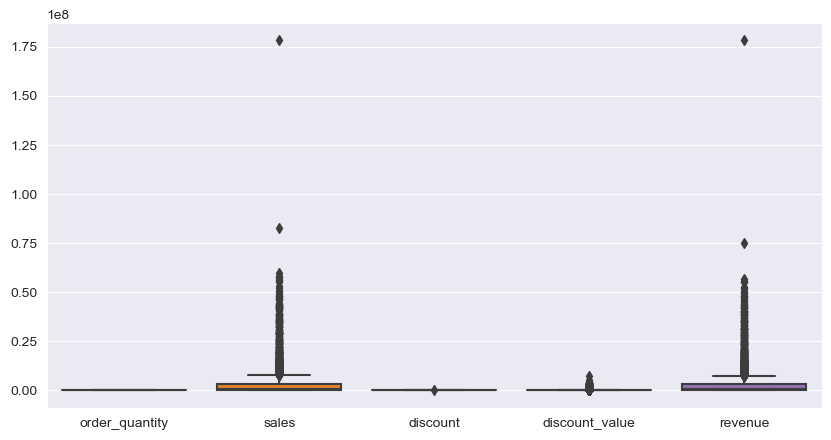

In [15]:
# Check outliers: boxplot
plt.figure(figsize = (10, 5))
sns.boxplot(data=df[['order_quantity','sales','discount','discount_value','revenue']])
plt.show()

We can see that the `sales` and `revenue` columns have values that are too far from the data points. Therefore, the `sales` and `revenue` columns have outlier values. Next, we need to remove the outlier values from the dataset using the IQR method.

### Remove outliers

In [16]:
# Define a function called 'outliers' which returns a list of index of outliers

def outliers(df, ft):
  q1 = df[ft].quantile(0.25)
  q3 = df[ft].quantile(0.75)
  iqr = q3 - q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]

  return ls

In [17]:
# Create an empty list to store output indices from multiple columns

index_list = []
for feature in ['sales','revenue']:
  index_list.extend(outliers(df, feature))

In [18]:
# Show list of index of outliers
index_list

[2,
 3,
 13,
 19,
 27,
 41,
 43,
 50,
 59,
 61,
 64,
 69,
 76,
 79,
 80,
 82,
 84,
 91,
 93,
 96,
 105,
 109,
 118,
 128,
 138,
 144,
 147,
 150,
 157,
 161,
 167,
 168,
 185,
 186,
 187,
 189,
 194,
 207,
 216,
 237,
 246,
 255,
 265,
 272,
 286,
 297,
 307,
 311,
 334,
 339,
 340,
 346,
 352,
 354,
 359,
 375,
 381,
 384,
 399,
 404,
 408,
 411,
 415,
 420,
 424,
 435,
 440,
 449,
 452,
 462,
 464,
 481,
 488,
 493,
 501,
 505,
 511,
 516,
 544,
 560,
 571,
 583,
 590,
 597,
 609,
 635,
 636,
 643,
 650,
 667,
 670,
 672,
 687,
 700,
 701,
 709,
 726,
 727,
 733,
 750,
 755,
 757,
 760,
 762,
 764,
 769,
 771,
 772,
 781,
 789,
 795,
 803,
 812,
 828,
 835,
 846,
 883,
 894,
 896,
 900,
 905,
 914,
 916,
 917,
 923,
 930,
 931,
 940,
 948,
 953,
 955,
 972,
 980,
 995,
 997,
 998,
 1000,
 1002,
 1024,
 1029,
 1031,
 1058,
 1067,
 1069,
 1070,
 1072,
 1082,
 1089,
 1091,
 1100,
 1123,
 1151,
 1152,
 1165,
 1175,
 1182,
 1183,
 1188,
 1192,
 1199,
 1202,
 1206,
 1207,
 1219,
 1221,
 12

In [19]:
# Define a function called 'remove' which returns a cleaned dataframe without outliers
def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [20]:
# Call 'remove' function
df = remove(df, index_list)

<Axes: >

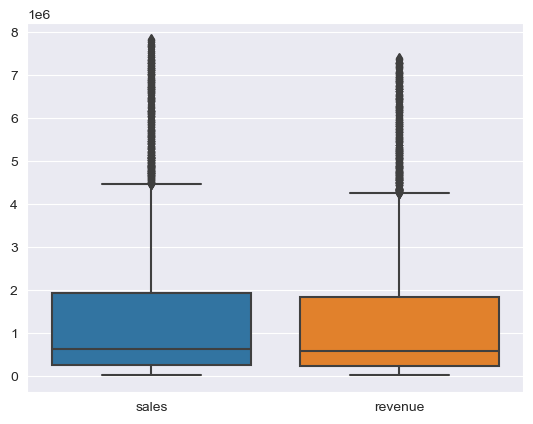

In [21]:
# Sanity check
sns.boxplot(data=df[['sales','revenue']])

We can see in the boxplot above, the `sales` and `revenue` columns no longer have outlier values.

In [22]:
df_clean.shape # Before remove outliers

(5499, 15)

In [23]:
df.shape # After remove outliers

(4797, 15)

For data exploration, we will use the `df` dataset with 4797 rows and 15 columns.

In [24]:
# Export clean df
df.to_csv('sales_clean.csv')

# Exploration

### Question 1. Which product categories and product sub-categories are most ordered?

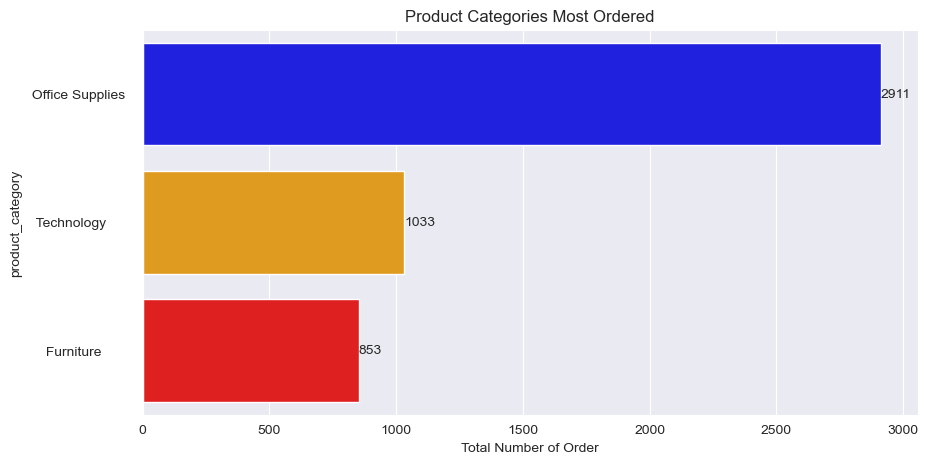

In [25]:
# Product category
most_cat = df.groupby('product_category')['order_id'].count().reset_index().sort_values(
    'order_id', ascending=False).set_index('product_category')
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=most_cat['order_id'], y=most_cat.index, palette=sns.blend_palette(['blue', 'orange', 'red'], 3))
ax.bar_label(ax.containers[0])
ax.set_title('Product Categories Most Ordered')
ax.set_xlabel('Total Number of Order')
plt.savefig('Product Categories Most Ordered.jpg')

'Office Supplies' is the product category with the highest order of 2911 times or about 60% of the total product categories ordered.

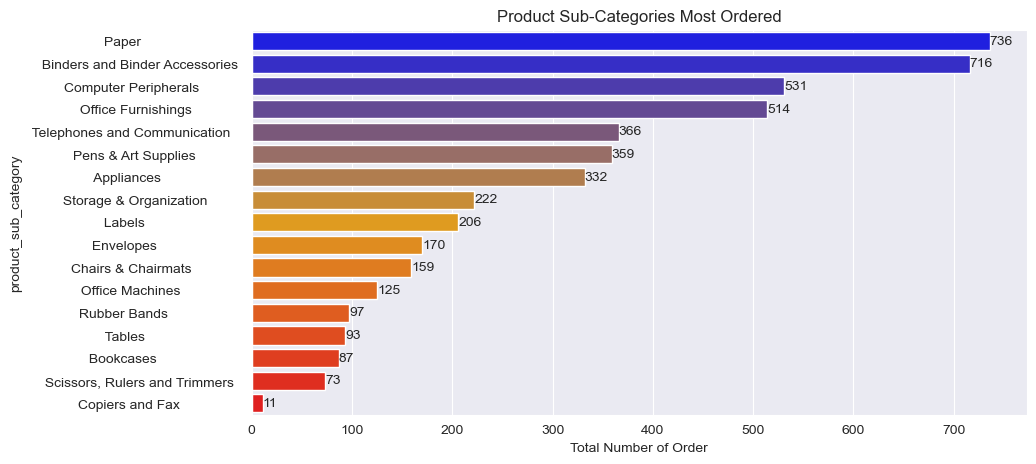

In [26]:
# Product sub-category
most_sub_cat = df.groupby('product_sub_category')['order_id'].count().reset_index().sort_values(
    'order_id', ascending=False).set_index('product_sub_category')
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=most_sub_cat['order_id'], y=most_sub_cat.index, palette=sns.blend_palette(['blue', 'orange', 'red'], 17))
ax.bar_label(ax.containers[0])
ax.set_title('Product Sub-Categories Most Ordered')
ax.set_xlabel('Total Number of Order')
plt.savefig('Product Sub-Categories Most Ordered.jpg')

'Paper' is the product sub-category with the highest order of 736 times or about 15% of the total product sub-categories ordered.

### Question 2. Which product categories and product sub-categories are most income?

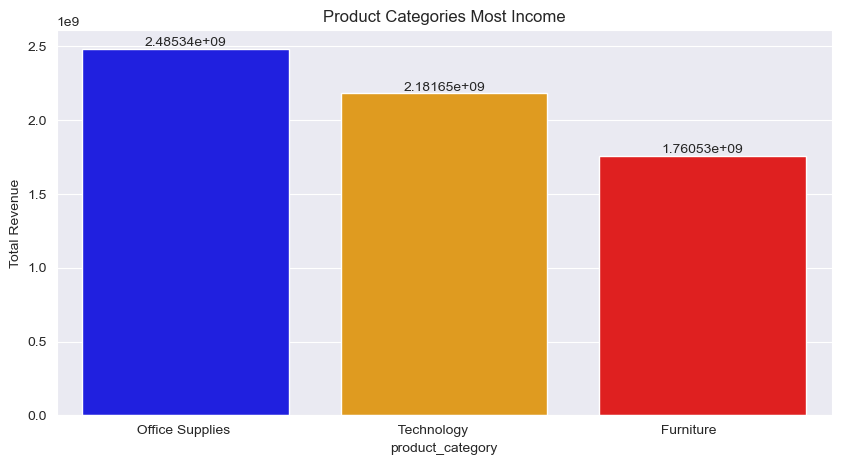

In [27]:
# Product category
cat_profit = df.groupby('product_category')['revenue'].sum().reset_index().sort_values(
    'revenue',ascending=False).set_index('product_category')
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=cat_profit.index, y=cat_profit['revenue'], palette=sns.blend_palette(['blue', 'orange', 'red'], 3))
ax.bar_label(ax.containers[0])
ax.set_title('Product Categories Most Income')
ax.set_ylabel('Total Revenue')
plt.savefig('Product Categories Most Income.jpg')

'Office Supplies' is the product category with the highest revenue of over 2.4 billion, or approximately 38% of the total product category revenue. Apart from being highly sold, the 'Office Supplies' product category also generates high revenue.

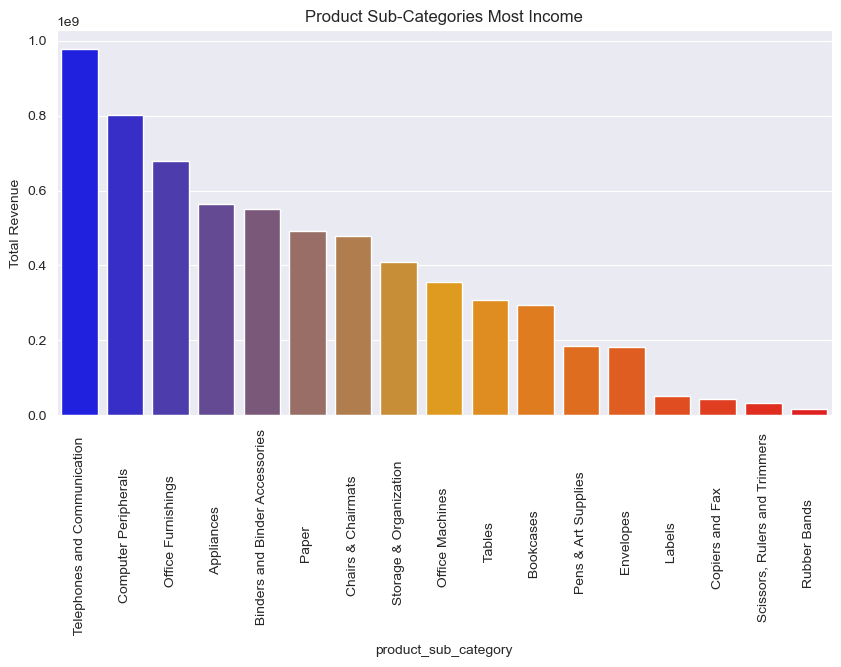

In [28]:
# Product sub-category
sub_cat_profit = df.groupby('product_sub_category')['revenue'].sum().reset_index().sort_values(
    'revenue',ascending=False).set_index('product_sub_category')
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
ax = sns.barplot(x=sub_cat_profit.index, y=sub_cat_profit['revenue'], palette=sns.blend_palette(['blue', 'orange', 'red'], 17))
ax.set_title('Product Sub-Categories Most Income')
ax.set_ylabel('Total Revenue')
plt.savefig('Product Sub-Categories Most Income.jpg')

'Telephones and Communication' is the product sub-category with the highest revenue of 978 million, or about 15% of the total revenue of all product sub-categories. However, the 'Telephones and Communication' product sub-category is not the highest-order item. This can happen because the price of the 'Telephones and Communication' is quite large when compared to the 'Paper'.

### Question 3. How is the quarterly performance of dqlab sales?

In [29]:
# Create palette dictionary for highlight bar chart
df['quarter'] = df['quarter'].astype('str')
palette_dict = {
     '2009Q1': 'gray', '2009Q2': 'gray', '2009Q3': 'gray', '2009Q4': 'gray',
     '2010Q1': 'red', '2010Q2': 'gray', '2010Q3': 'gray', '2010Q4': 'gray',
     '2011Q1': 'gray', '2011Q2': 'gray', '2011Q3': 'gray', '2011Q4': 'gray',
     '2012Q1': 'gray', '2012Q2': 'blue', '2012Q3': 'gray', '2012Q4': 'gray'
}

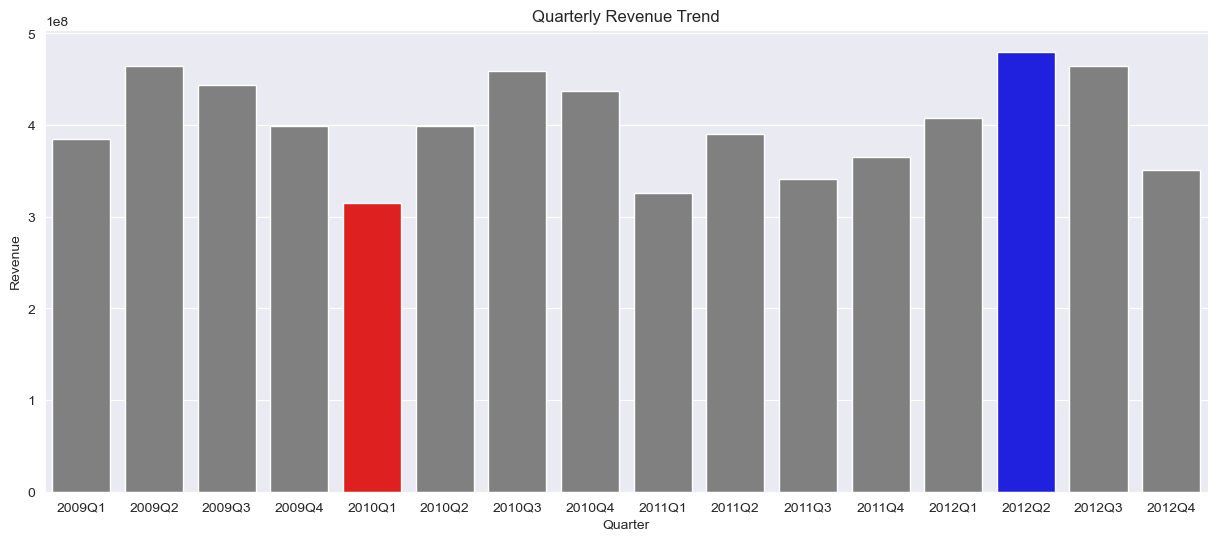

In [30]:
qtr_rev = df.groupby('quarter')['revenue'].sum().reset_index()
plt.figure(figsize=(15,6))
ax = sns.barplot(data=qtr_rev, x='quarter', y='revenue', palette=palette_dict)
ax.set_title('Quarterly Revenue Trend')
ax.set_ylabel('Revenue')
ax.set_xlabel('Quarter')
plt.savefig('Quarterly Revenue Trend.jpg')

Revenue tends to peak in the 2nd (April–June) or 3rd (July–September) quarter. The highest revenue occurred in the 2nd quarter of 2012, with 480 million, or approximately 28% of total revenue during 2012. The lowest revenue occurred in the first quarter of 2010.

### Question 4. How is the monthly performance of dqlab sales?

In [31]:
# Sorting the names of months and years
mnth_rev = df.groupby('month')['revenue'].sum().reset_index()
mapping = {
    'January-2009':0,'February-2009':1,'March-2009':2,'April-2009':3,'May-2009':4,'June-2009':5,
    'July-2009':6,'August-2009':7,'September-2009':8,'October-2009':9,'November-2009':10,'December-2009':11,
    'January-2010':12,'February-2010':13,'March-2010':14,'April-2010':15,'May-2010':16,'June-2010':17,
    'July-2010':18,'August-2010':19,'September-2010':20,'October-2010':21,'November-2010':22,'December-2010':23,
    'January-2011':24,'February-2011':25,'March-2011':26,'April-2011':27,'May-2011':28,'June-2011':29,
    'July-2011':30,'August-2011':31,'September-2011':32,'October-2011':33,'November-2011':34,'December-2011':35,
    'January-2012':36,'February-2012':37,'March-2012':38,'April-2012':39,'May-2012':40,'June-2012':41,
    'July-2012':42,'August-2012':43,'September-2012':44,'October-2012':45,'November-2012':46,'December-2012':47
}
mnth_rev['sorting'] = mnth_rev['month'].apply(lambda month_name: mapping[month_name])
mnth_rev = mnth_rev.sort_values(by='sorting',axis=0)

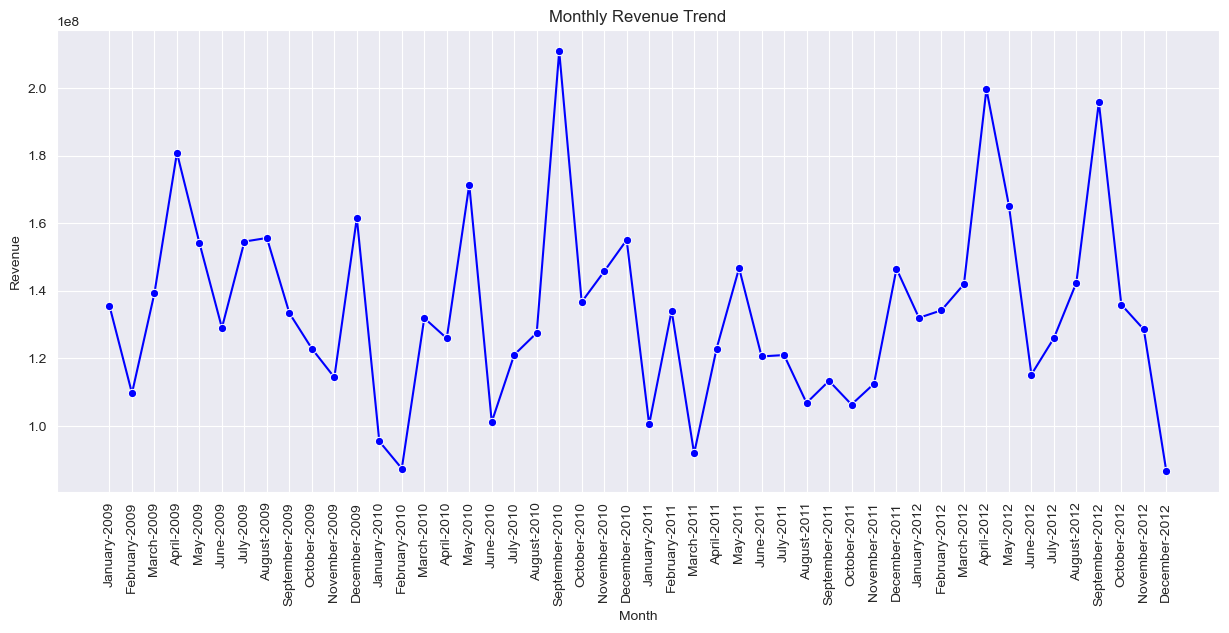

In [32]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=mnth_rev, x='month', y='revenue', marker='o', dashes=False, errorbar=None, color='blue')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Monthly Revenue Trend')
ax.set_ylabel('Revenue')
ax.set_xlabel('Month')
plt.savefig('Monthly Revenue Trend.jpg')

Sales in September 2010 generated the highest revenue of 210 million, an increase of about 65% from the previous month (August 2010). Revenues also peaked thereafter in April and September 2012, generating 199 million and 195 million, respectively.

### Question 5. How is the daily performance of dqlab sales?

In [33]:
# Sorting the names of days
day_rev = df.groupby('week_day')['revenue'].sum().reset_index()
mapping = {
    'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6
}
day_rev['sorting'] = day_rev['week_day'].apply(lambda day_name: mapping[day_name])
days_rev = day_rev.sort_values(by='sorting',axis=0)

In [34]:
# Create palette dictionary for highlight bar chart
palette_dict = {
    'Monday': 'blue', 'Tuesday': 'gray', 'Wednesday': 'gray', 'Thursday': 'gray',
    'Friday': 'gray', 'Saturday': 'blue', 'Sunday': 'gray'
}

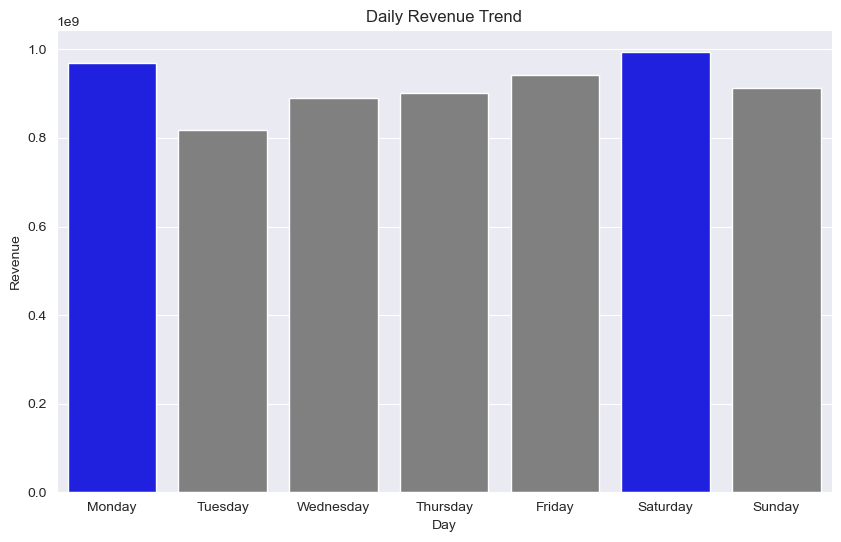

In [35]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=days_rev, x='week_day', y='revenue', palette=palette_dict)
ax.set_title('Daily Revenue Trend')
ax.set_ylabel('Revenue')
ax.set_xlabel('Day')
plt.savefig('Daily Revenue Trend.jpg')

Sales on Saturday generated the highest revenue of 993 million. In addition, revenue was also high on Monday, reaching 969 million. Revenue peaked on Monday at the beginning of the weekday (15.08%) and on Saturday at the beginning of the weekend (15.45%).

### Question 6. Which product sub-categories are frequently returned and cancelled by customers?

In [36]:
# Filter order_status = returned and canceled
df_canc_ret = df[df['order_status'].str.contains("Returned","Cancelled")]

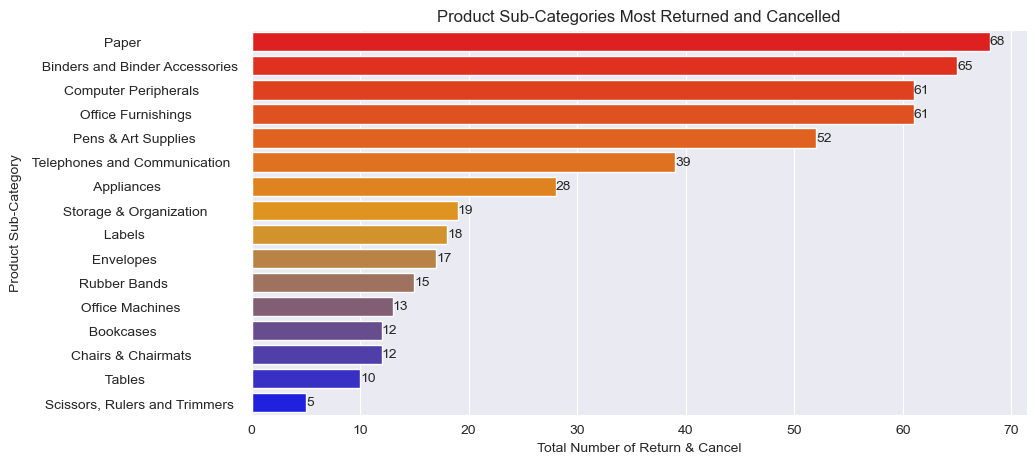

In [37]:
most_return = df_canc_ret.groupby('product_sub_category')['order_id'].count().reset_index().sort_values(
    'order_id', ascending=False).set_index('product_sub_category')
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=most_return['order_id'], y=most_return.index, palette=sns.blend_palette(['red', 'orange', 'blue'], 16))
ax.bar_label(ax.containers[0])
ax.set_title('Product Sub-Categories Most Returned and Cancelled')
ax.set_xlabel('Total Number of Return & Cancel')
ax.set_ylabel('Product Sub-Category')
plt.savefig('Product Sub-Categories Most Returned and Cancelled.jpg')

'Paper' is the product sub-category with the highest number of canceled and returned orders, with 68 times, or about 13.73% of the total unsuccessful orders. Returned or canceled orders can be caused by several factors, such as shipping duration, shipping quality, and item quality. Unfortunately, we don't have the `ship_date`, `ship_arrived`, `ship_mode`, and `customer_rating` columns to ascertain the quality of the product and shipment to find the root cause of why the order was returned or canceled.

# Conclusion

Based on the exploration and analysis of DQLab Store's sales performance, we can conclude several things, which are:
- The most orders are dominated by the 'Office Supplies' category (60%) and the 'Paper' sub-category (15%).
- The highest revenue was dominated by the 'Office Supplies' category (38%) and the 'Telephones and Communication' sub-category (15%).
- The highest revenue occurred in Q2-2012 (28%; over 2012).
- The highest revenue occurred in September 2010 (increase 65%).
- Revenue peaked on Mondays (15.08%) and Saturdays (15.45%).
- The product with the highest number of cancellations and returns was the 'Paper' sub-category (13.73%).

# Recommendation

- Increase the stock of the most ordered products to handle the high demand from customers.
- Increase product stock in Q2 (April–June) and Q3 (July–September) to handle the high demand in those time periods.
- Offer special promotions for bundled products in Q1 (January, February, and March) of each year. The target of product bundling is the sub-category that has the lowest sales value. This special offer is expected to increase the number of sales of products that are not selling well and boost revenue in Q1.
- Provide special coupons for transactions on weekends to attract customers, thus increasing orders and revenue.
- Provide free delivery service on weekdays to facilitate transactions for customers who are busy working, thereby increasing the number of orders and revenue.